# DIAMOND PRICE PREDICTION

# Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing dataset as dataframe

In [3]:
df=pd.read_csv(r"C:\Users\DELL\Documents\Diamond.csv")
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Introduction about the data : The dataset
The goal is to predict price of given diamond (Regression Analysis).
There are 10 independent variables.

carat: we know that carat is the weight of diamond,so we can rename column name as a just carat by removing weight of the diamond
to look simple and clasic dataset.

cut: Quality of Diamond cut.

color: Color of Diamond.

clarity:Diamond clarity is measure of the purity and rarity of the stone.

depth : The depth of daimond is its height measured from the culet to the table.

table: A diamond table is the facet which can be seen when the stone is viewed face up.

X: Diamond X dimension 
Y: Y dimension
Z: Z dimension

In [4]:
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price(in US dollars)      53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.isna().sum()

Carat(Weight of Daimond)    0
Cut(Quality)                0
Color                       0
Clarity                     0
Depth                       0
Table                       0
Price(in US dollars)        0
X(length)                   0
Y(width)                    0
Z(Depth)                    0
dtype: int64

In [7]:
df.duplicated().sum()

146

In [8]:
df.shape

(53940, 10)

In [9]:
df.rename({'Carat(Weight of Daimond)':'Carat','Cut(Quality)':'Cut','Price(in US dollars)':'Price','X(length)':'X','Y(width)':'Y','Z(Depth)':'Z'},axis=1,inplace=True)

In [10]:
df.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
df.sample(10)

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
44654,0.29,Very Good,G,VVS1,62.0,58.0,522,4.19,4.23,2.61
36595,0.30,Ideal,F,IF,62.0,56.0,947,4.30,4.34,2.68
31300,0.32,Ideal,D,VS2,62.1,56.0,758,4.39,4.43,2.74
39538,0.40,Premium,F,VS2,61.0,58.0,1080,4.79,4.72,2.90
17793,1.14,Ideal,G,VS2,61.5,57.0,7171,6.72,6.68,4.12
7494,1.01,Ideal,F,SI2,61.4,56.0,4239,6.46,6.51,3.98
12489,1.02,Premium,G,SI1,61.1,58.0,5255,6.52,6.48,3.97
42652,0.40,Very Good,E,VVS1,62.8,57.0,1333,4.65,4.71,2.94
53846,0.82,Very Good,E,SI1,63.2,57.0,2741,5.92,5.97,3.76
22261,1.09,Ideal,E,VVS2,61.6,56.0,10314,6.60,6.64,4.08


In [12]:
df['Color'].value_counts()

Color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [13]:
cat_columns=df.columns[df.dtypes=='object']

In [14]:
cat_columns

Index(['Cut', 'Color', 'Clarity'], dtype='object')

In [15]:
num_columns=df.columns[df.dtypes!='object']

In [16]:
num_columns

Index(['Carat', 'Depth', 'Table', 'Price', 'X', 'Y', 'Z'], dtype='object')

In [17]:
df[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
Depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
Table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
Price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
X,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
Y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
Z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [18]:
cat_columns.value_counts()

Cut        1
Color      1
Clarity    1
Name: count, dtype: int64

In [19]:
for col in cat_columns:
    print(df[col].value_counts())
    print(f"here is the total count:{len(df[col].value_counts())}")
    print("========================")

Cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
here is the total count:5
Color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
here is the total count:7
Clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64
here is the total count:8


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/n


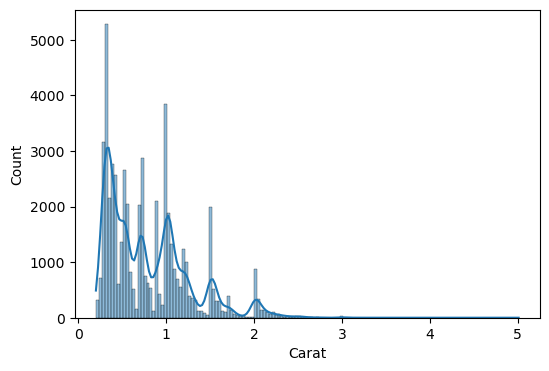

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/n


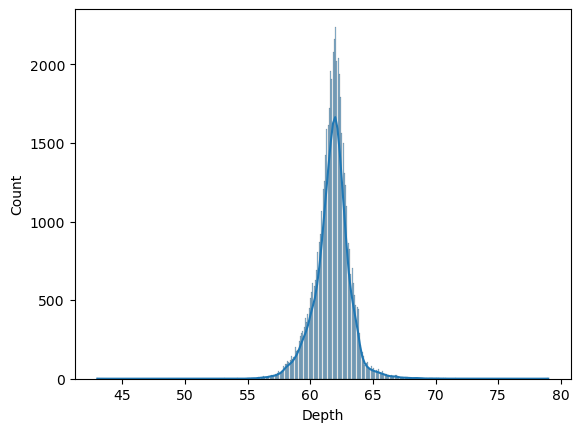

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/n


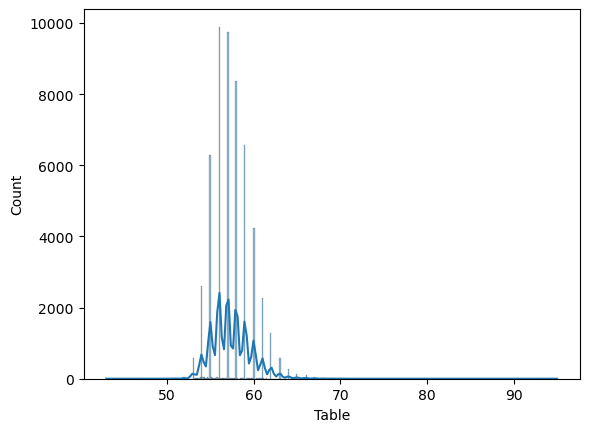

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/n


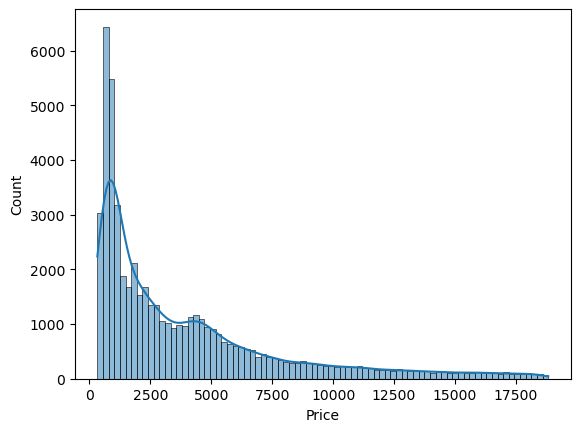

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/n


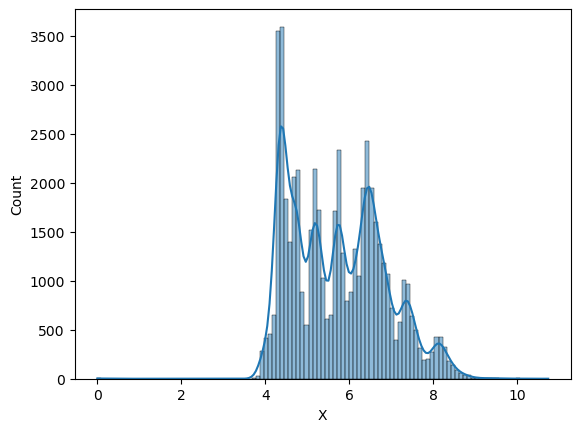

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/n


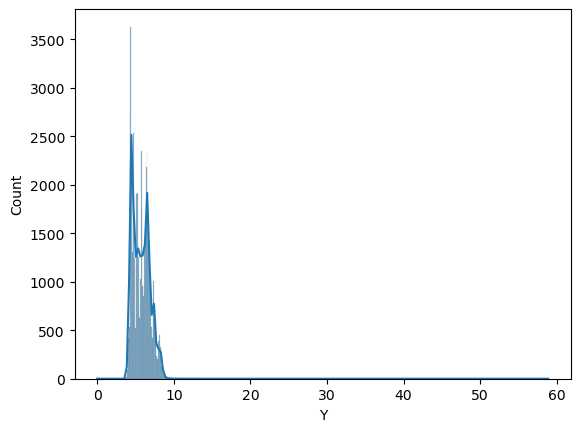

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/n


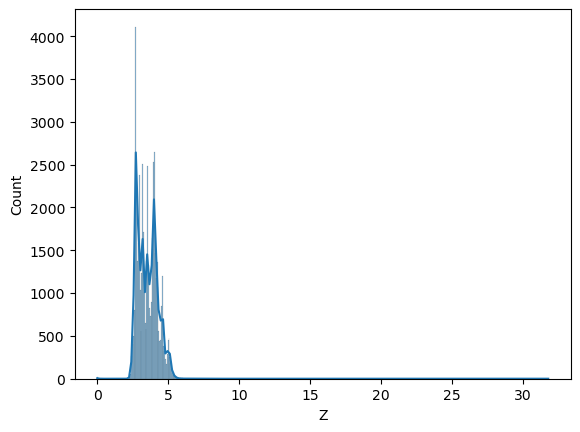

In [20]:
plt.figure(figsize=(6,4))

for col in num_columns:
    sns.histplot(data=df,x=col,kde=True)
    print("/n")
    plt.show()

<Axes: >

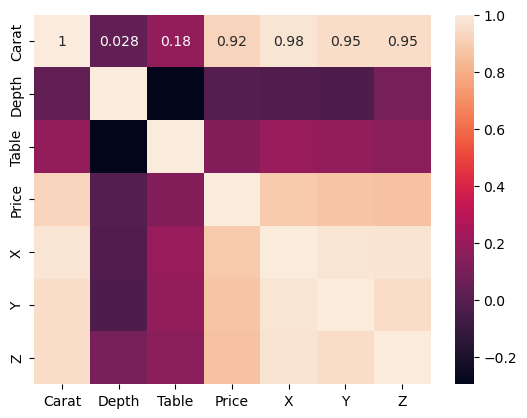

In [21]:
sns.heatmap(df[num_columns].corr(),annot=True)

In [22]:
df[num_columns].corr()

,Carat,Depth,Table,Price,X,Y,Z
Carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
Depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
Table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
Price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
X,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
Y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
Z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [23]:
df.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [24]:
# ordinal coding
cut_map={'Fair':1,'Good':2,"Very Good":3,"Premium":4,"Ideal":5}
color_map={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}
clarity_map={'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}

In [25]:
df["Cut"]=df["Cut"].map(cut_map)
df["Color"]=df['Color'].map(color_map)
df["Clarity"]=df["Clarity"].map(clarity_map)

In [26]:
df

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,1,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,1,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,1,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,5,2,61.0,58.0,2757,6.15,6.12,3.74


In [27]:
from sklearn.model_selection import train_test_split
X=df.drop(["Price"],axis=1)
y=df["Price"]



In [28]:
X.head()

,Carat,Cut,Color,Clarity,Depth,Table,X,Y,Z
0,0.23,5,2,2,61.5,55.0,3.95,3.98,2.43
1,0.21,4,2,3,59.8,61.0,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,4.05,4.07,2.31
3,0.29,4,6,4,62.4,58.0,4.20,4.23,2.63
4,0.31,2,7,2,63.3,58.0,4.34,4.35,2.75


In [29]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: Price, Length: 53940, dtype: int64

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
X_test.shape

(13485, 9)

In [32]:
X_train.shape

(40455, 9)

In [33]:
from sklearn.preprocessing import StandardScaler #handling feature scaling
#pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# model training

In [34]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [35]:
!pip install xgboost

In [36]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'RandomForest':RandomForestRegressor(),
    'xgboost':XGBRegressor()
}

In [37]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [38]:
list(models)

['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'RandomForest', 'xgboost']

In [39]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [40]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'RandomForest', 'xgboost'])

In [41]:
list(models.values())[1]

Lasso()

In [42]:
def evaluate_model(true,pred):
    r2=r2_score(true,pred),
    mae=mean_absolute_error(true,pred),
    mse=mean_squared_error(true,pred)

    return mse, mae, r2

In [43]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    #make prediction
    y_pred=model.predict(X_test)
    #this is for the validation
    MAE,MSE,R2=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:",MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")

model training performance LinearRegression()
MSE: (802.9384712009037,)
MAE: 1463335.2897656094
R2 SCORE: (0.9068514326187412,)


model training performance Lasso()
MSE: (805.0823664593705,)
MAE: 1464171.1691505373
R2 SCORE: (0.9067982247396215,)


model training performance Ridge()
MSE: (803.3401568633849,)
MAE: 1463413.5545038693
R2 SCORE: (0.9068464506789928,)


model training performance ElasticNet()
MSE: (1142.6078007685203,)
MAE: 2911002.6350714955
R2 SCORE: (0.8147002078085526,)


model training performance RandomForestRegressor()
MSE: (267.7339851604663,)
MAE: 292619.6084126725
R2 SCORE: (0.9813733069229327,)


model training performance XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
       

In [44]:
r2_list

[(0.9068514326187412,),
 (0.9067982247396215,),
 (0.9068464506789928,),
 (0.8147002078085526,),
 (0.9813733069229327,),
 (0.9808663358513836,)]

In [45]:
max(r2_list)

(0.9813733069229327,)

In [46]:
import logging
import os
from datetime import datetime

In [47]:
LOG_FILE=f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log"

log_path=os.path.join(os.getcwd(),"logs")

os.makedirs(log_path,exist_ok=True)

LOG_FILEPATH=os.path.join(log_path,LOG_FILE)

In [48]:
LOG_FILEPATH

'C:\\Users\\DELL\\logs\\04_23_2024_14_06_19.log'

In [49]:
logging.basicConfig(level=logging.INFO,
                    filename=LOG_FILEPATH,
                    format="[%(asctime)s] %(lineno)d %(name)s - %(levelname)s - %(message)s"

                   )

In [50]:
logging.info("this is my test log")